In [1]:
# Imports

import numpy as np
import time

from auxiliary_functions.aux_functions import *
from leakage_inductance.LeakageInductanceCalculator import *

In [ ]:
'''

Flowchart:

##### UNIVERSAL USER INPUT #####

0. Inductor or Transformer?

1. Topology -> Operating Conditions (Frequency, PeakCurrent, etc)

2. Core Selection: Manufacturer -> Family -> Sub Family -> Model Name -> Core Material

3. Bobbin DEFINITION: Normal or Split -> Bobbin Thickness -> IF Normal -> Windings Spacing
                                                          -> IF Split -> Primary Section Height -> Inter-section Spacing -> Secondary Section Height

4. Winding Definition: Number of Turns, Wire Type -> IF Litz -> Number of Strands, Strands Diameter, Insulation Thickness (Strand and Bundle)
                                                     IF Solid -> Diameter, Insulation Thickness


##### AUTOMATIC #####   

1. Fit Check

2. Windings Equivalent Blocks

3. ?

'''

# User Input Block

In [62]:
# 0.
MagneticDeviceType = 'Transformer' # For now only transformers are supported


# 1.
Topology = 'None'           # WIP
Frequency = 100e3           # Switching Frequency in Hz
PeakCurrent_1 = 1           # Always Referred to the Primary in the case of an Transformer


# 2.
#SelectedCore = GetCore("TDK", "ETD", "ETD 29", "ETD 29/16/10", "N87")
SelectedCore = {'family': 'ETD', 'sub-family': 'ETD34', 'A': 34.2e-3, 'B': 17.3e-3, 'C': 10.8e-3, 'D': 12.1e-3, 'E': 26.4e-3, 'F': 10.8e-3}
WindowWidth = 7.8e-3
WindowHeight = 24.4e-3


# 3.
BobbinType = 'Normal' 
BobbinThickness = 1e-3  

# IF BobbinType = 'Normal'
WindingsSpacing = 1e-3  

# IF BobbinType = 'Split'
PrimaryHeight       = 0
InterSectionSpacing = 0
SecondaryHeight     = 0

# 4.
NumberOfTurns_1 = 64
NumberOfTurns_2 = 34
WireType = 'Solid'

# IF WireType = 'Solid'
ConductorDiameter_1   = 1e-3
InsulationThickness_1 = 0.1e-3
ConductorDiameter_2   = 1e-3
InsulationThickness_2 = 0.1e-3

# IF WireType = 'Litz'
NumberOfStrands             = 40
StrandDiameter              = 0.1e-3
StrandInsulationThickness   = 0.01e-3
BundleInsulationThickness   = 0.1e-3
#ConductorDiameter           = LitzDiameter(NumberOfStrands, StrandDiameter, StrandInsulationThickness, BundleInsulationThickness)   # MODELO DO CHINES PARA DETERMINAR DIAMETRO DO FIO LITZ


# Windings fit check and core window plot

c:\Users\Joshua\OneDrive\Projetos\Magnetics Modeling\Magnetics-Modeling\auxiliary_functions\aux_functions.py:226: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  self.ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))


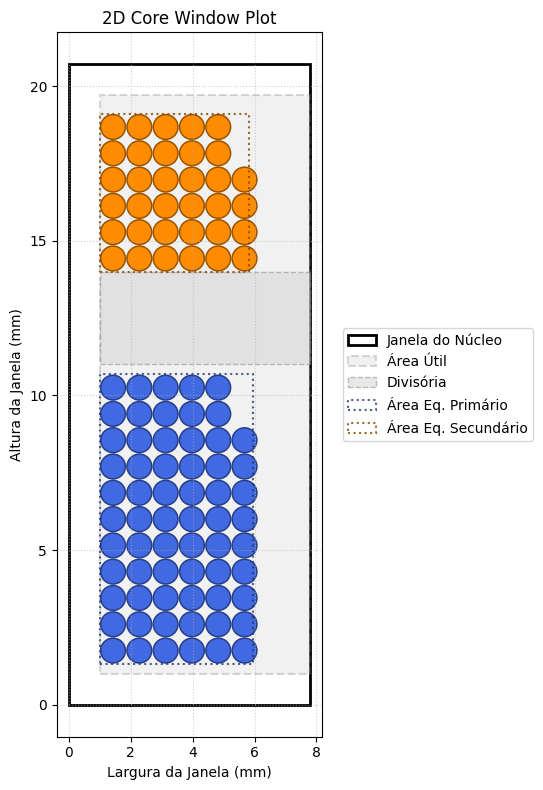

In [73]:
# EXEMPLO ETD34 No. 4

# Treated User Input based on raw user input
MagneticDeviceParameters = {
    'WindowWidth': 7.8e-3, 
    'WindowHeight': 20.7e-3, 
    'BobbinType': 'Split', 
    'BobbinThickness': 1e-3,

    'NumberOfTurns_1': 64, 
    'NumberOfTurns_2': 34,
    'ConductorDiameter_1': 0.75e-3, 
    'InsulationThickness_1': 0.05e-3,
    'ConductorDiameter_2': 0.75e-3, 
    'InsulationThickness_2': 0.05e-3,

    'PrimaryHeight': 10e-3, 
    'InterSectionSpacing': 3e-3, 
    'SecondaryHeight': 5.7e-3,
    'PrimaryYAlignSplit': 'center', 
    'SecondaryYAlignSplit': 'bottom'
}

# --- PASSO 2: CRIAR O CALCULISTA ---
WindingsParameters = WindingMaker(**MagneticDeviceParameters)

# --- PASSO 3: EXTRAIR OS DADOS ---
TurnsCoordinates = WindingsParameters.get_all_coordinates()
EquivalentWindingsBlocks = WindingsParameters.get_equivalent_dims()

# --- PASSO 4: CRIAR O ARTISTA ---
CoreWindowPlot = TransformerPlotter(
    WindowWidth=MagneticDeviceParameters['WindowWidth'], WindowHeight=MagneticDeviceParameters['WindowHeight'], 
    BobbinThickness=MagneticDeviceParameters['BobbinThickness'], BobbinType=MagneticDeviceParameters['BobbinType'],
    PrimaryHeight=MagneticDeviceParameters['PrimaryHeight'], InterSectionSpacing=MagneticDeviceParameters['InterSectionSpacing']
)

# --- PASSO 5: MANDAR O ARTISTA DESENHAR ---
CoreWindowPlot.plot_geometry(
    coordinates=TurnsCoordinates, 
    winding_dims=EquivalentWindingsBlocks,
    ConductorDiameter_1=MagneticDeviceParameters['ConductorDiameter_1'], InsulationThickness_1=MagneticDeviceParameters['InsulationThickness_1'],
    ConductorDiameter_2=MagneticDeviceParameters['ConductorDiameter_2'], InsulationThickness_2=MagneticDeviceParameters['InsulationThickness_2']
)

# --- PASSO 6: FINALIZAR E EXIBIR ---
CoreWindowPlot.finalize_and_show(instance_name="Grafico_Split_Completo_e_Correto")


# Leakage Inductance (HQ3D)
### Uses Equivalent Windings Blocks parameters  

In [74]:

inicio = time.perf_counter()

# Passo 1: Crie a instância da classe (o cálculo acontece aqui, automaticamente)
TransformerLeakageInductance = LeakageInductanceCalculator(
    SelectedCore, 
    'Primary',
    WindowWidth, WindowHeight,
    EquivalentWindingsBlocks,
    NumberOfTurns_1, NumberOfTurns_2
)

fim = time.perf_counter()
print(f"Execution Time = {(fim - inicio)*1e3:.1f} ms")


# Passo 2: Acesse o resultado que já foi calculado e armazenado
print(f"Transformer Leakage Inductance = {TransformerLeakageInductance.LeakageInductance*1e6:.2f} uH")





Execution Time = 26.9 ms
Transformer Leakage Inductance = 255.06 uH
